# Linear Regression, Cost Function, Gradient Descent, and Derivatives

This notebook covers:
- The prediction function in linear regression
- How to calculate predictions
- Mean squared error (cost function)
- The gradient descent algorithm and how it works
- What is a derivative?
- What is a partial derivative?
- Python code to implement gradient descent
- **Exercise:** Derive a linear function for given test data using gradient descent

---

## 1. The Prediction Function
In linear regression, the prediction function estimates the output (\( \hat{y} \)) for a given input (\( x \)) using learned parameters (weights and bias).

- **Single variable:**
  \[ \hat{y} = w x + b \]
- **Multiple variables:**
  \[ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b \]

## 2. How to Calculate Predictions
Plug the input values and learned parameters into the prediction function formula above.

---

## 3. Mean Squared Error (Cost Function)
The cost function measures how well the model predicts the data.

\[
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
\]
where \( m \) = number of samples, \( \hat{y}_i \) = predicted value, \( y_i \) = actual value.

---

## 4. Gradient Descent Algorithm and How it Works
Gradient descent is an optimization algorithm that updates model parameters to minimize the cost function:
- Compute the gradient (slope) of the cost function with respect to each parameter.
- Update parameters in the opposite direction of the gradient.

---

## 5. What is a Derivative?
A derivative measures how a function changes as its input changes. In machine learning, it tells us how much the cost function changes as we change a parameter.

---

## 6. What is a Partial Derivative?
A partial derivative measures how a function changes as one variable changes, keeping others constant. Used in multivariable functions.

---

## 7. Python Code: Linear Regression with Gradient Descent
Below is a complete implementation of linear regression using gradient descent, including visualization and an exercise for you to try with your own data.

---

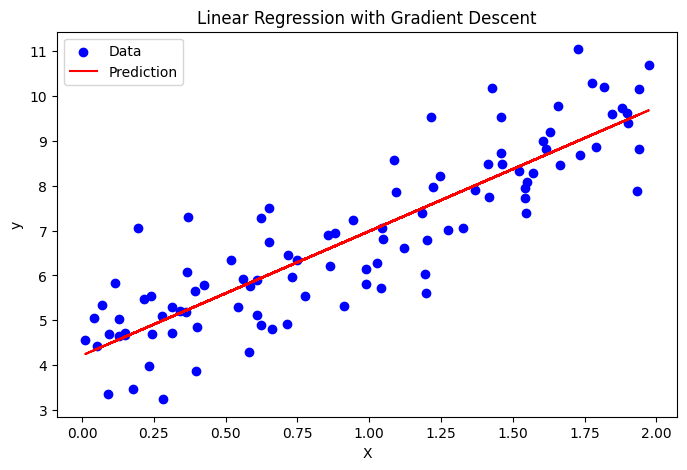

Learned weight: 2.77, bias: 4.22


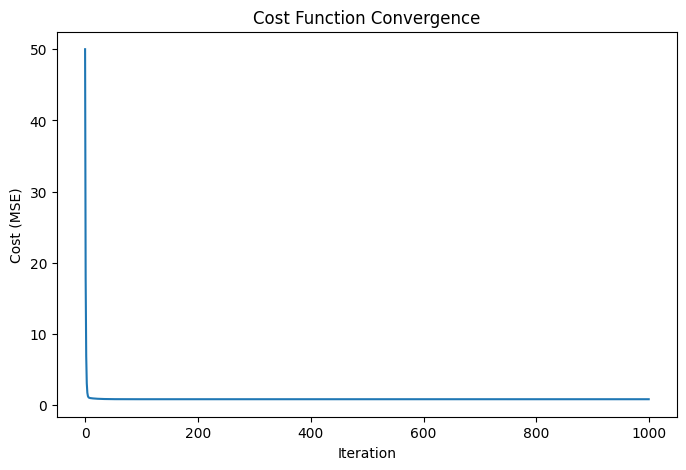

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Prediction function
def predict(X, w, b):
    return X.dot(w) + b

# Mean Squared Error (Cost Function)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent Algorithm
def gradient_descent(X, y, lr=0.1, n_iters=1000):
    m = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    b = 0
    cost_history = []
    for i in range(n_iters):
        y_pred = predict(X, w, b)
        # Compute gradients
        dw = (2/m) * X.T.dot(y_pred - y)
        db = (2/m) * np.sum(y_pred - y)
        # Update parameters
        w -= lr * dw
        b -= lr * db
        # Save cost
        cost = mean_squared_error(y, y_pred)
        cost_history.append(cost)
    return w, b, cost_history

# Train the model
w, b, cost_history = gradient_descent(X, y, lr=0.1, n_iters=1000)

# Make predictions
y_pred = predict(X, w, b)

# Plot results
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.show()

# Print learned parameters
print(f"Learned weight: {w.flatten()[0]:.2f}, bias: {b:.2f}")

# Plot cost history
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.show()

---

## 8. Exercise: Derive a Linear Function for Your Own Data

Replace the synthetic data in the code above with your own dataset. For example, you can load data from a CSV file using pandas:

```python
import pandas as pd
# Load your data
# df = pd.read_csv('your_data.csv')
# X = df[['feature_column']].values
# y = df[['target_column']].values
```

Then, run the gradient descent code to find the best-fit line for your data!

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the housing data
df = pd.read_csv(r'../Housing.csv')

# Use 'area' as feature (X) and 'price' as target (y)
X = df[['area']].values  # shape (n_samples, 1)
y = df[['price']].values  # shape (n_samples, 1)

# Normalize X for better gradient descent performance
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

def predict(X, w, b):
    return X.dot(w) + b

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, lr=0.1, n_iters=1000):
    m = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    b = 0
    cost_history = []
    for i in range(n_iters):
        y_pred = predict(X, w, b)
        dw = (2/m) * X.T.dot(y_pred - y)
        db = (2/m) * np.sum(y_pred - y)
        w -= lr * dw
        b -= lr * db
        cost = mean_squared_error(y, y_pred)
        cost_history.append(cost)
    return w, b, cost_history

# Train the model on normalized X
w, b, cost_history = gradient_descent(X_norm, y, lr=0.1, n_iters=1000)

y_pred = predict(X_norm, w, b)

# Plot results
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression Fit: Price vs Area')
plt.show()

print(f"Learned weight (normalized): {w.flatten()[0]:.2f}, bias: {b:.2f}")

plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.show()